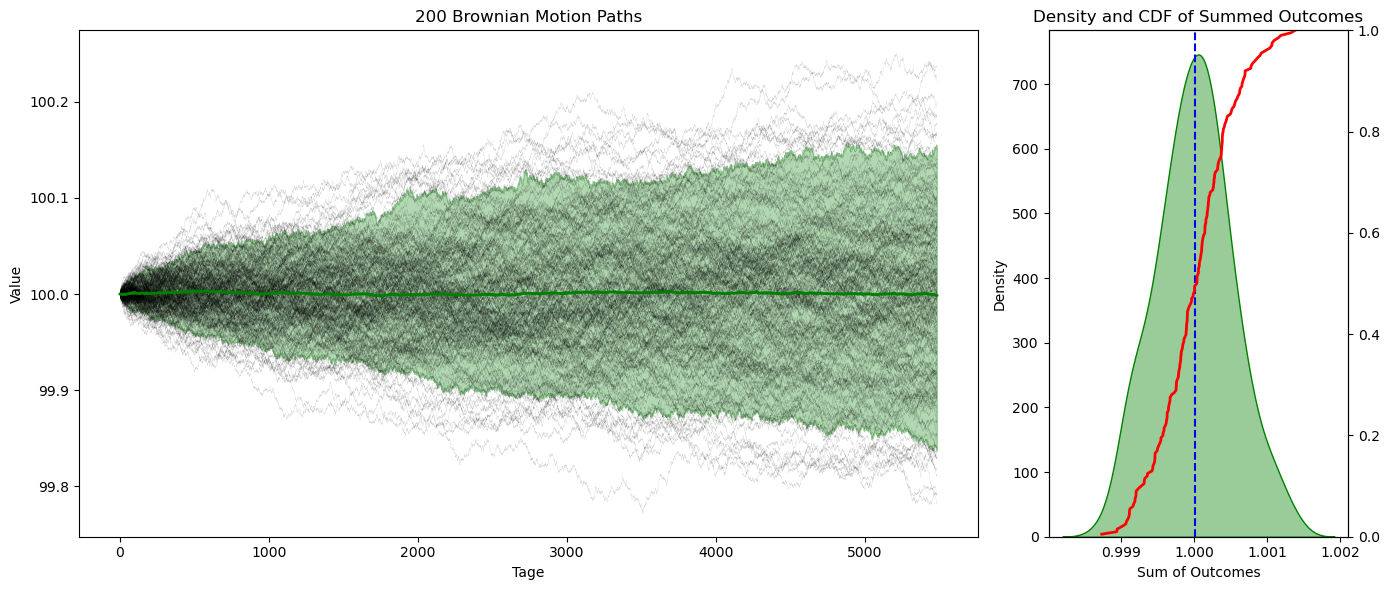

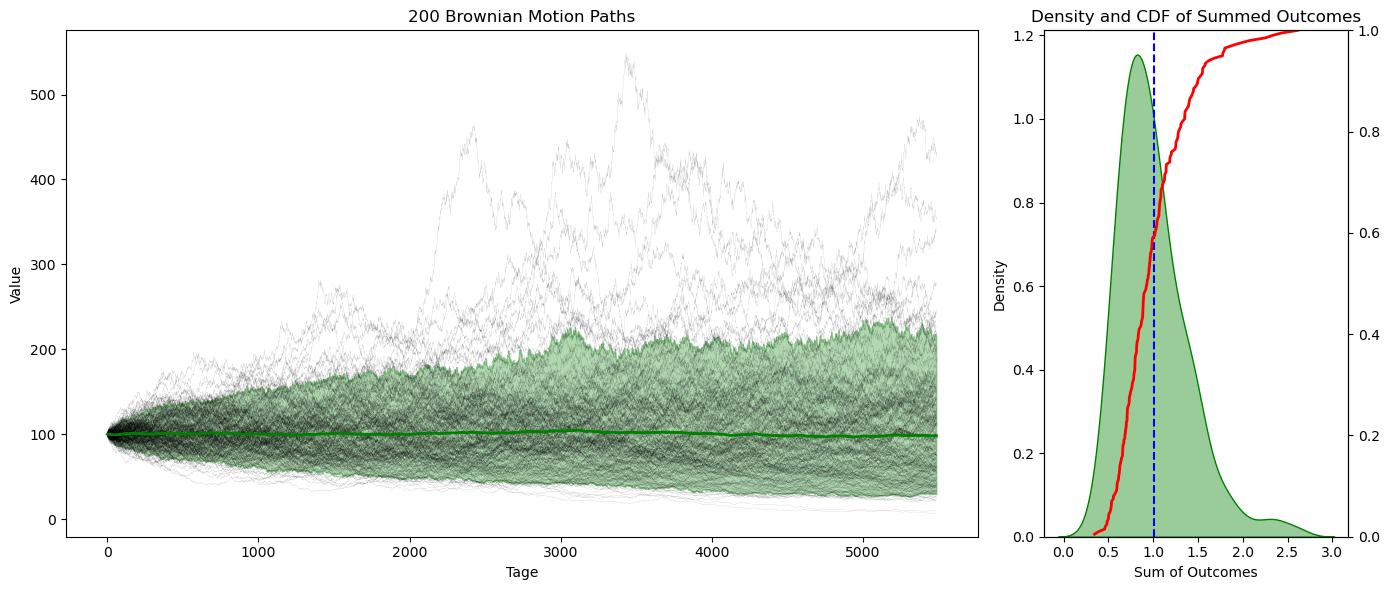

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to generate a single Brownian motion
def brownian_motion(array: np.array):
    array[0] = 100 
    for i in range(1, len(array)):
        array[i] = array[i - 1] + 0.002*np.random.uniform(-1, 1)
    return array

#   Geometrical brownian motion 
#   
#
# Geometric Brownian Motion (GBM) function using an input array
def geometric_brownian_motion(array: np.array):
    """
    Simulates a Geometric Brownian Motion (GBM) path using an input array.
    
    Parameters:
    - array: An array of zeros with length equal to the number of steps.
    - mu: Drift coefficient, representing the average expected return of the asset.
    - sigma: Volatility of the asset, representing the randomness in price changes.
    - T: Total time duration (e.g., in years).
    
    Returns:
    - np.array: The input array filled with simulated asset prices over time.
    """
    mu      = 0.01 
    sigma   = 0.3
    T       = 5.0
    # Number of steps derived from the length of the array
    steps = len(array)
    
    # Calculate the time increment for each step
    dt = T / steps
    
    # Set the initial value of the asset price
    array[0] = 100  # You can change this to your desired starting price (e.g., S0)

    # Generate the random shocks (Wiener process increments)
    random_shocks = np.random.normal(0, 1, steps - 1)
    
    # Iterate through each time step to calculate the price using the GBM formula
    for i in range(1, steps):
        # Calculate the change in the price
        dS = (mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * random_shocks[i - 1]
        
        # Update the price based on the previous price and the calculated change
        array[i] = array[i - 1] * np.exp(dS)
    
    return array



# Wrapper function to generate and collect k Brownian motions
def generate_brownian_motions(identifier : int,k: int, steps: int):
    match identifier:
        case 1:
            paths = np.zeros((k, steps))
            for i in range(k):
                paths[i] = brownian_motion(np.zeros(steps))
        case 2:
            paths = np.zeros((k, steps))
            for i in range(k):
                paths[i] = geometric_brownian_motion(np.zeros(steps))
    return paths


# Function to plot the time series and the distribution on the right
def plot_combined_brownian_distribution(identifier : int, k: int, steps: int):
    
    paths = generate_brownian_motions(identifier ,k, steps)

    # Calculate statistics for the time series
    mean_path = np.mean(paths, axis=0)
    p5_path = np.percentile(paths, 5, axis=0)
    p95_path = np.percentile(paths, 95, axis=0)
    
    # Calculate the summed outcomes for each path
    summed_outcomes = np.sum(paths, axis=1)/steps/100

    # Create the combined plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [3, 1]})

    # Plot the individual Brownian motion paths as thin lines
    time_steps = np.arange(steps)
    for path in paths:
        ax1.plot(time_steps, path, color='black', alpha=0.4, linewidth=0.1)

    # Plot the time series with mean and percentiles
    ax1.plot(time_steps, mean_path, color='green', label='Mean', linewidth=2)
    ax1.fill_between(time_steps, p5_path, p95_path, color='green', alpha=0.3, label='5% - 95%')
    ax1.set_xlabel('Tage')
    ax1.set_ylabel('Value')
    ax1.set_title(f'{k} Brownian Motion Paths')
    ax1.grid(False)

    # Create the density plot of the summed outcomes on the right
    sns.kdeplot(x=summed_outcomes, ax=ax2, color='green', fill=True, alpha=0.4)
    ax2.axvline(np.mean(summed_outcomes), color='blue', linestyle='--', label='Mean Outcome')
    ax2.set_xlabel('Sum of Outcomes')
    ax2.set_ylabel('Density')
    ax2.set_title('Density and CDF of Summed Outcomes')
    ax2.grid(False)

    # Create a secondary x-axis for the CDF
    ax2_cdf = ax2.twinx()
    sorted_outcomes = np.sort(summed_outcomes)
    cdf = np.arange(1, len(sorted_outcomes) + 1) / len(sorted_outcomes)
    ax2_cdf.plot(sorted_outcomes, cdf, color='red', linestyle='-', linewidth=2, label='CDF')
    ax2_cdf.set_xlabel('Cumulative Probability')
    ax2_cdf.set_ylim(0,1)  # Align the x-axis range with the density plot for consistency

    # Add legends

    plt.tight_layout()
    plt.show()

"""
1   =   brownian motion
2   =   geometrical brownian motion 
"""
# Example usage: plot 100 Brownian motions with 100 steps each
plot_combined_brownian_distribution(1,k=200, steps=5487)
# Example usage: plot 100 Brownian motions with 100 steps each
plot_combined_brownian_distribution(2,k=200, steps=5487)